In [1]:
#Imports
import re

import unicodedata
import nltk
from wordcloud import WordCloud
import nltk.sentiment

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import env as e
import acquire as a

# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

# 1.
Spam Data



Load the spam data set.


In [2]:
#Get SQL database url
url = e.get_db_url('spam_db')

In [3]:
#Define SQL query
query = '''
        SELECT *
        FROM spam
        '''

In [4]:
#Read SQL
df = pd.read_sql(query, url, index_col='id')
df.head(5)

label                                               text
id                                                         
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

In [5]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', '4', 'ltgt']

def clean(text):
    '''
    A simple function to cleanup text data.
    
    Args:
        text (str): The text to be cleaned.
        
    Returns:
        list: A list of lemmatized words after cleaning.
    '''
    
    # basic_clean() function from last lesson:
    # Normalize text by removing diacritics, encoding to ASCII, decoding to UTF-8, and converting to lowercase
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    
    # Remove punctuation, split text into words
    words = re.sub(r'[^\w\s]', '', text).split()
    
    
    # lemmatize() function from last lesson:
    # Initialize WordNet lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Combine standard English stopwords with additional stopwords
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    
    # Lemmatize words and remove stopwords
    cleaned_words = [wnl.lemmatize(word) for word in words if word not in stopwords]
    
    return cleaned_words

In [6]:
ham_words = clean(' '.join(df[df.label=='ham']['text']))
spam_words = clean(' '.join(df[df.label=='spam']['text']))
all_words = clean(' '.join(df['text']))

In [7]:
len(all_words), len(spam_words), len(ham_words)

(50018, 12044, 37974)

In [8]:
# let's get some sights on word frequency by taking our words back apart
# we will split each set of words by the spaces,
# turn that into a list, cast that list as a Series,
# and then take the value counts of that Series
# We will do this for each type of word present

ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [9]:
ham_freq.head()

im      449
get     314
go      273
ok      272
dont    257
dtype: int64

In [10]:
spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [11]:
all_freq.head()

call    600
im      462
get     397
ur      384
go      304
dtype: int64

Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?


In [12]:
#create a list of spam and ham bigrams
spam_bigrams = list(nltk.bigrams(spam_words))
ham_bigrams = list(nltk.bigrams(ham_words))

In [13]:
#check them out
spam_bigrams

[('free', 'entry'),
 ('entry', 'wkly'),
 ('wkly', 'comp'),
 ('comp', 'win'),
 ('win', 'fa'),
 ('fa', 'cup'),
 ('cup', 'final'),
 ('final', 'tkts'),
 ('tkts', '21st'),
 ('21st', 'may'),
 ('may', '2005'),
 ('2005', 'text'),
 ('text', 'fa'),
 ('fa', '87121'),
 ('87121', 'receive'),
 ('receive', 'entry'),
 ('entry', 'questionstd'),
 ('questionstd', 'txt'),
 ('txt', 'ratetcs'),
 ('ratetcs', 'apply'),
 ('apply', '08452810075over18s'),
 ('08452810075over18s', 'freemsg'),
 ('freemsg', 'hey'),
 ('hey', 'darling'),
 ('darling', '3'),
 ('3', 'week'),
 ('week', 'word'),
 ('word', 'back'),
 ('back', 'id'),
 ('id', 'like'),
 ('like', 'fun'),
 ('fun', 'still'),
 ('still', 'tb'),
 ('tb', 'ok'),
 ('ok', 'xxx'),
 ('xxx', 'std'),
 ('std', 'chgs'),
 ('chgs', 'send'),
 ('send', 'a150'),
 ('a150', 'rcv'),
 ('rcv', 'winner'),
 ('winner', 'valued'),
 ('valued', 'network'),
 ('network', 'customer'),
 ('customer', 'selected'),
 ('selected', 'receivea'),
 ('receivea', 'a900'),
 ('a900', 'prize'),
 ('prize', 'rew

In [14]:
#check them out
ham_bigrams

[('go', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet'),
 ('buffet', 'cine'),
 ('cine', 'got'),
 ('got', 'amore'),
 ('amore', 'wat'),
 ('wat', 'ok'),
 ('ok', 'lar'),
 ('lar', 'joking'),
 ('joking', 'wif'),
 ('wif', 'oni'),
 ('oni', 'dun'),
 ('dun', 'say'),
 ('say', 'early'),
 ('early', 'hor'),
 ('hor', 'c'),
 ('c', 'already'),
 ('already', 'say'),
 ('say', 'nah'),
 ('nah', 'dont'),
 ('dont', 'think'),
 ('think', 'go'),
 ('go', 'usf'),
 ('usf', 'life'),
 ('life', 'around'),
 ('around', 'though'),
 ('though', 'even'),
 ('even', 'brother'),
 ('brother', 'like'),
 ('like', 'speak'),
 ('speak', 'treat'),
 ('treat', 'like'),
 ('like', 'aid'),
 ('aid', 'patent'),
 ('patent', 'per'),
 ('per', 'request'),
 ('request', 'melle'),
 ('melle', 'melle'),
 ('melle', 'oru'),
 ('oru', 'minnaminunginte'),
 ('minnaminunginte', 'nurungu'),
 ('nurung

In [15]:
#create a series of the spam bigrams and get counts
spam_bigrams_series = pd.Series(spam_bigrams)
spam_bigrams_counts = spam_bigrams_series.value_counts()
spam_bigrams_counts.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

In [16]:
#create a series of the ham bigrams and get counts
ham_bigrams_series = pd.Series(ham_bigrams)
ham_bigrams_counts = ham_bigrams_series.value_counts()
ham_bigrams_counts.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

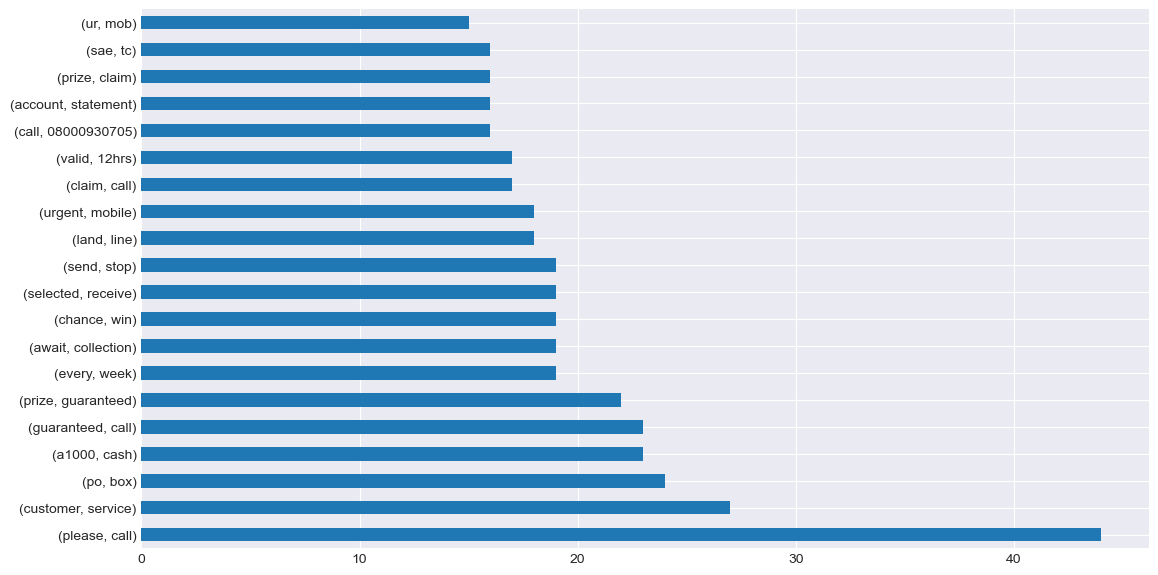

In [17]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(20).plot.barh()
plt.show()

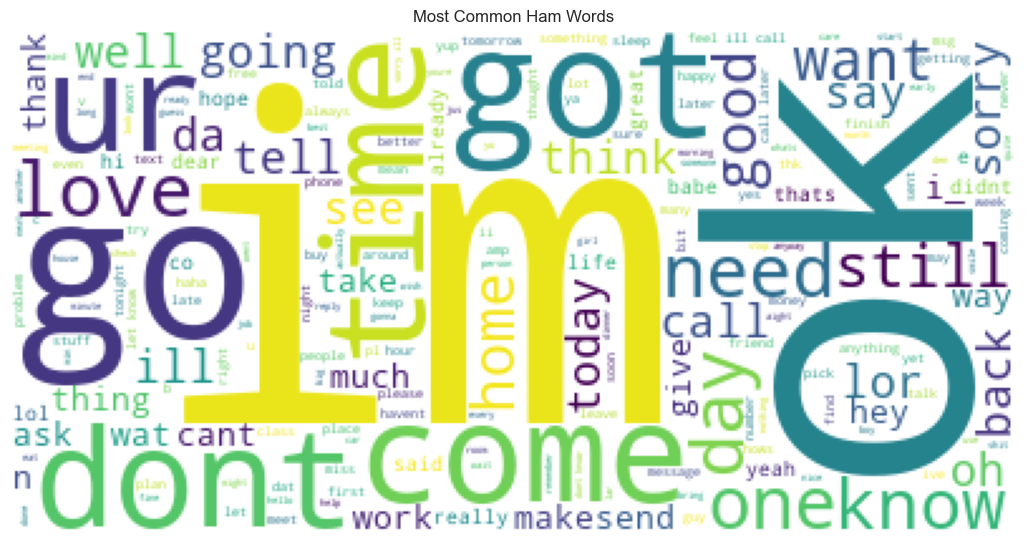

In [18]:
img = WordCloud(background_color='white').generate(' '.join(ham_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

Is there any overlap in the bigrams for the spam data and the ham data?


In [19]:
#identify the bigrams shared between the two (spam and ham)
overlap_bigrams = spam_bigrams_counts.index.intersection(ham_bigrams_counts.index)
overlap_bigrams


Index([     ('please', 'call'), ('customer', 'service'),
                 ('po', 'box'),       ('every', 'week'),
              ('send', 'stop'),          ('tell', 'ur'),
              ('free', 'call'),    ('mobile', 'number'),
              ('call', 'free'),         ('think', 'ur'),
       ...
                ('hey', 'got'),       ('would', 'like'),
               ('like', 'see'),        ('26th', 'july'),
               ('im', 'bored'),         ('sim', 'card'),
                  ('hi', 'ya'),           ('hey', 'im'),
              ('back', 'work'),          ('go', 'back')],
      dtype='object', length=180)

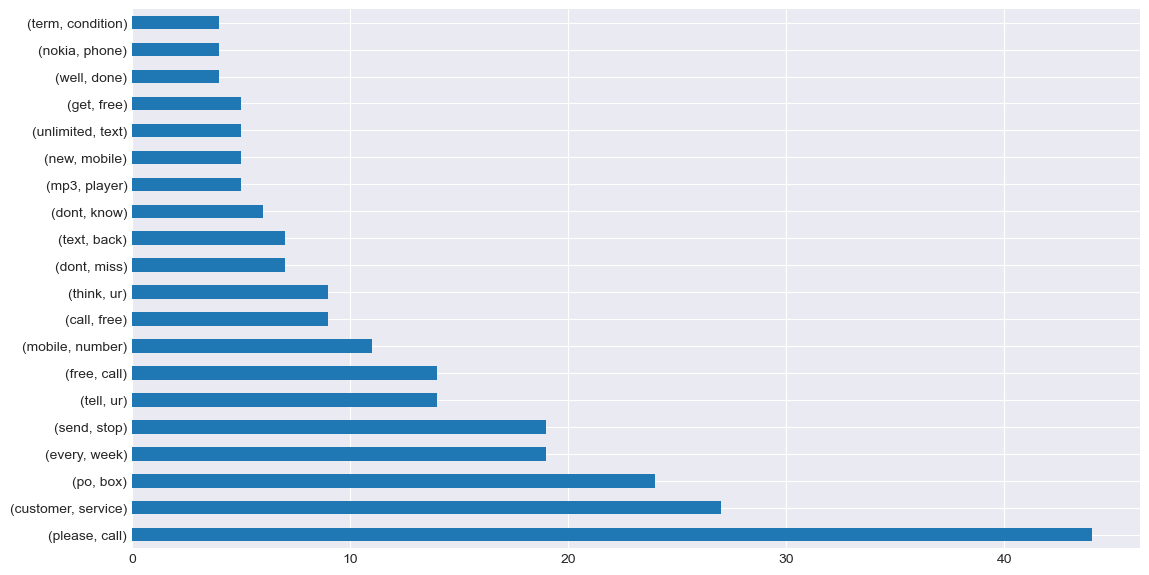

In [20]:
#plot the results
overlap_bigrams_counts = spam_bigrams_counts[overlap_bigrams]
overlap_bigrams_counts.head(20).plot.barh()
plt.show()

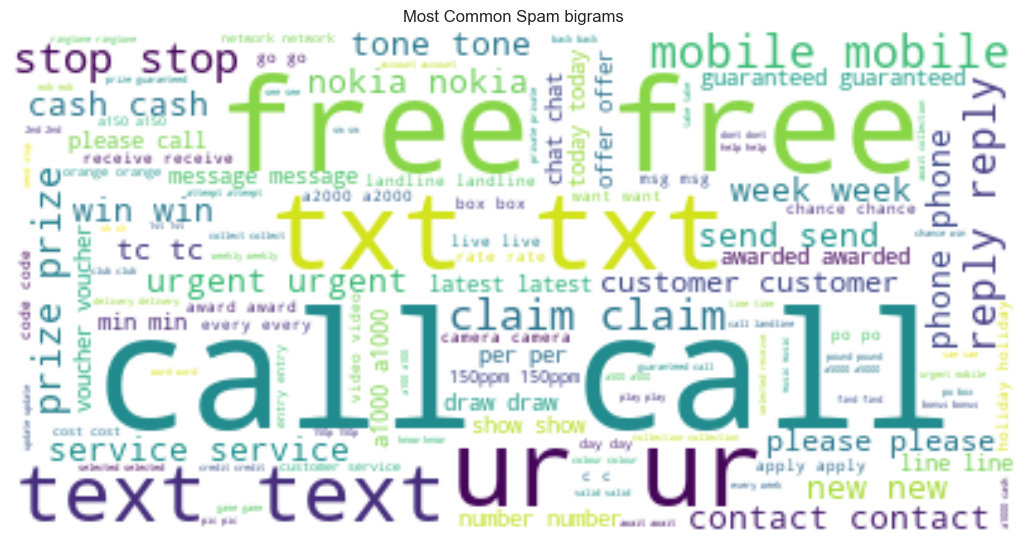

In [21]:
# spam bigrams wordcloud

# Convert bigrams into a string format
bigram_strings = [' '.join(bigram) for bigram in spam_bigrams]
text = ' '.join(bigram_strings)

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Spam bigrams')
plt.show()


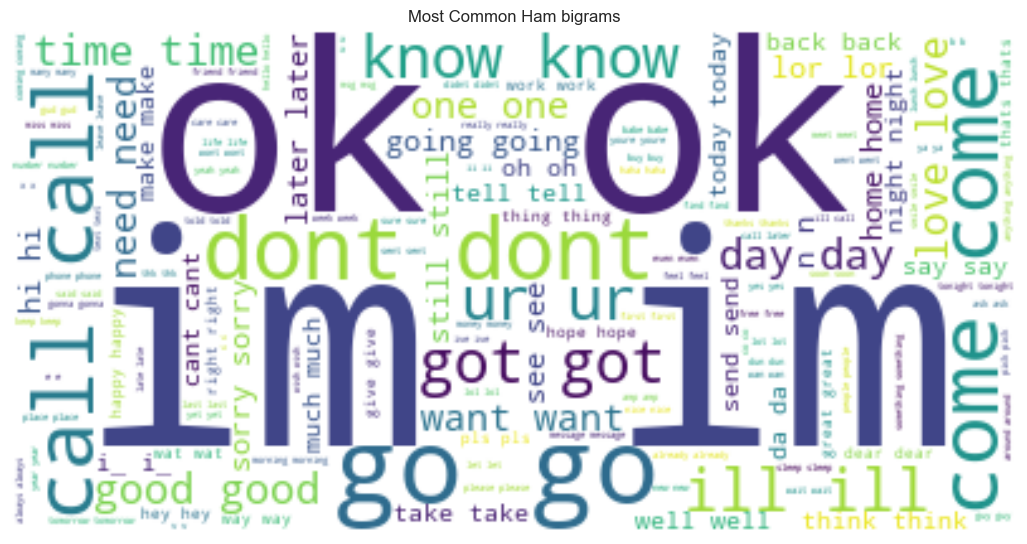

In [22]:
# ham bigrams wordcloud

# Convert bigrams into a string format
h_bigram_strings = [' '.join(bigram) for bigram in ham_bigrams]
text = ' '.join(h_bigram_strings)

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Ham bigrams')
plt.show()

Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [23]:
#create a list of spam and ham bigrams
spam_trigrams = list(nltk.ngrams(spam_words,3))
ham_trigrams = list(nltk.ngrams(ham_words,3))

In [24]:
#check them out
spam_trigrams

[('free', 'entry', 'wkly'),
 ('entry', 'wkly', 'comp'),
 ('wkly', 'comp', 'win'),
 ('comp', 'win', 'fa'),
 ('win', 'fa', 'cup'),
 ('fa', 'cup', 'final'),
 ('cup', 'final', 'tkts'),
 ('final', 'tkts', '21st'),
 ('tkts', '21st', 'may'),
 ('21st', 'may', '2005'),
 ('may', '2005', 'text'),
 ('2005', 'text', 'fa'),
 ('text', 'fa', '87121'),
 ('fa', '87121', 'receive'),
 ('87121', 'receive', 'entry'),
 ('receive', 'entry', 'questionstd'),
 ('entry', 'questionstd', 'txt'),
 ('questionstd', 'txt', 'ratetcs'),
 ('txt', 'ratetcs', 'apply'),
 ('ratetcs', 'apply', '08452810075over18s'),
 ('apply', '08452810075over18s', 'freemsg'),
 ('08452810075over18s', 'freemsg', 'hey'),
 ('freemsg', 'hey', 'darling'),
 ('hey', 'darling', '3'),
 ('darling', '3', 'week'),
 ('3', 'week', 'word'),
 ('week', 'word', 'back'),
 ('word', 'back', 'id'),
 ('back', 'id', 'like'),
 ('id', 'like', 'fun'),
 ('like', 'fun', 'still'),
 ('fun', 'still', 'tb'),
 ('still', 'tb', 'ok'),
 ('tb', 'ok', 'xxx'),
 ('ok', 'xxx', 'std'),

In [25]:
#check them out
ham_trigrams

[('go', 'jurong', 'point'),
 ('jurong', 'point', 'crazy'),
 ('point', 'crazy', 'available'),
 ('crazy', 'available', 'bugis'),
 ('available', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world'),
 ('great', 'world', 'la'),
 ('world', 'la', 'e'),
 ('la', 'e', 'buffet'),
 ('e', 'buffet', 'cine'),
 ('buffet', 'cine', 'got'),
 ('cine', 'got', 'amore'),
 ('got', 'amore', 'wat'),
 ('amore', 'wat', 'ok'),
 ('wat', 'ok', 'lar'),
 ('ok', 'lar', 'joking'),
 ('lar', 'joking', 'wif'),
 ('joking', 'wif', 'oni'),
 ('wif', 'oni', 'dun'),
 ('oni', 'dun', 'say'),
 ('dun', 'say', 'early'),
 ('say', 'early', 'hor'),
 ('early', 'hor', 'c'),
 ('hor', 'c', 'already'),
 ('c', 'already', 'say'),
 ('already', 'say', 'nah'),
 ('say', 'nah', 'dont'),
 ('nah', 'dont', 'think'),
 ('dont', 'think', 'go'),
 ('think', 'go', 'usf'),
 ('go', 'usf', 'life'),
 ('usf', 'life', 'around'),
 ('life', 'around', 'though'),
 ('around', 'though', 'even'),
 ('though', 'even', 'brother'),
 ('even', 'brother', 'like'),

In [26]:
#create a series of the spam trigrams and get counts
spam_trigrams_series = pd.Series(spam_trigrams)
spam_trigrams_counts = spam_trigrams_series.value_counts()
spam_trigrams_counts.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(reply, call, 08000930705)    14
(land, line, claim)           14
(private, 2003, account)      13
dtype: int64

In [27]:
#create a series of the ham bigrams and get counts
ham_trigrams_series = pd.Series(ham_trigrams)
ham_trigrams_counts = ham_trigrams_series.value_counts()
ham_trigrams_counts.head()

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(pick, phone, right)    12
dtype: int64

In [28]:
#identify the trigrams shared between the two (spam and ham)
overlap_trigrams = spam_trigrams_counts.index.intersection(ham_trigrams_counts.index)
overlap_trigrams

Index([   ('please', 'call', 'back'),        ('new', 'year', 'eve'),
         ('sorry', 'missed', 'call'),      ('number', 'im', 'glad'),
       ('called', 'left', 'message')],
      dtype='object')

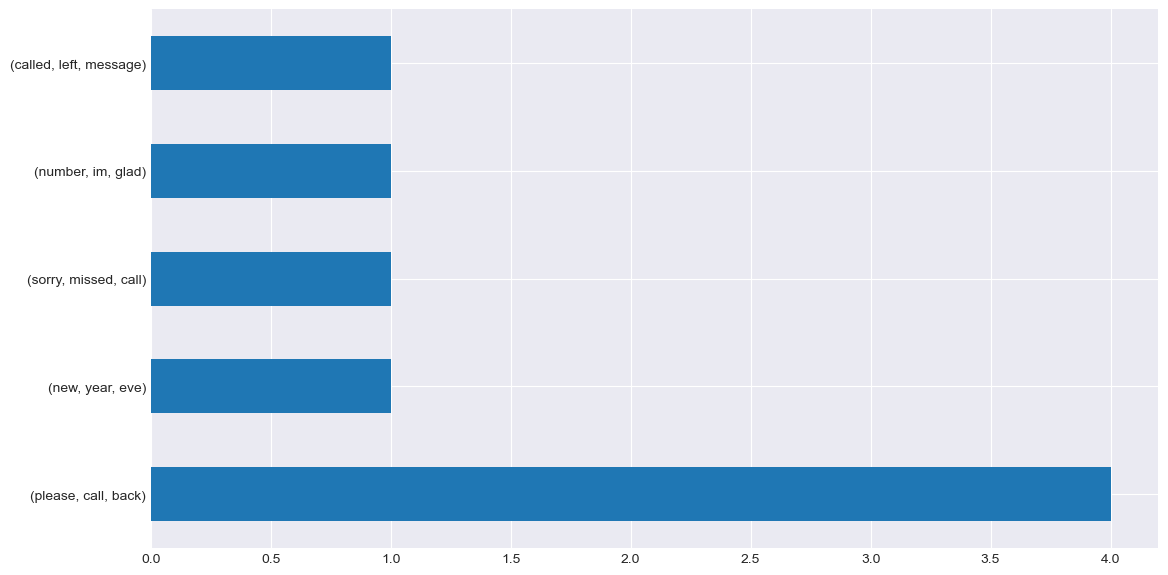

In [29]:
#plot the results
overlap_trigrams_counts = spam_trigrams_counts[overlap_trigrams]
overlap_trigrams_counts.head(20).plot.barh()
plt.show()

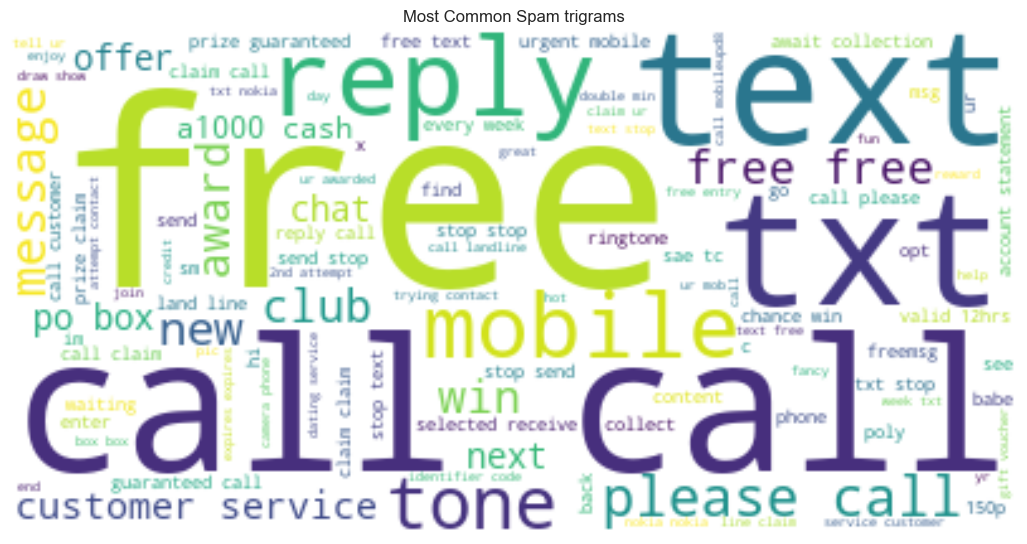

In [30]:
# spam trigrams wordcloud

# Convert bigrams into a string format
s_trigram_strings = [' '.join(trigram) for trigram in spam_trigrams]
text = ' '.join(s_trigram_strings)

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Spam trigrams')
plt.show()

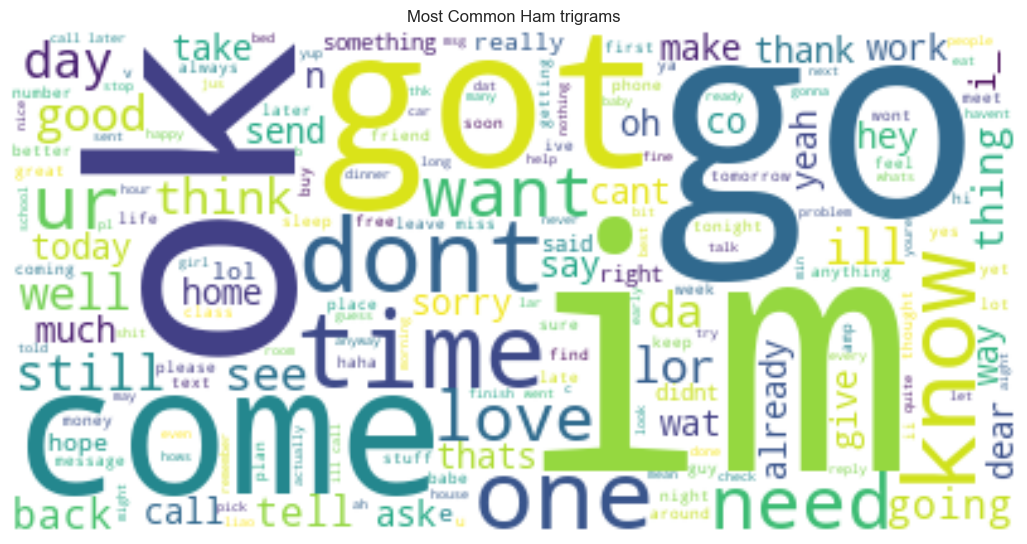

In [31]:
# ham trigrams wordcloud

# Convert bigrams into a string format
h_trigram_strings = [' '.join(trigram) for trigram in ham_trigrams]
text = ' '.join(h_trigram_strings)

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Ham trigrams')
plt.show()

# 2.
Explore the blog articles using the techniques discussed in the exploration lesson.



In [32]:
#get blog articles df
url = 'https://codeup.com/blog/'
dfc = a.get_all_articles(url)
dfc

title  \
0  Spotlight on APIDA Voices: Celebrating Heritag...   
1  Women in tech: Panelist Spotlight – Magdalena ...   
2  Women in tech: Panelist Spotlight – Rachel Rob...   
3   Women in Tech: Panelist Spotlight – Sarah Mellor   
4  Women in Tech: Panelist Spotlight – Madeleine ...   
5  Black Excellence in Tech: Panelist Spotlight –...   

                                             content  
0  May is traditionally known as Asian American a...  
1  Codeup is hosting a Women in Tech Panel in hon...  
2  Codeup is hosting a Women in Tech Panel in hon...  
3  Codeup is hosting a Women in Tech Panel in hon...  
4  Codeup is hosting a Women in Tech Panel in hon...  
5   Codeup is hosting a Black Excellence in Tech ...

In [33]:
dfc_all_words = clean(' '.join(dfc['content']))
dfc_all_words

['may',
 'traditionally',
 'known',
 'asian',
 'american',
 'pacific',
 'islander',
 'aapi',
 'heritage',
 'month',
 'month',
 'celebrate',
 'history',
 'contribution',
 'made',
 'possible',
 'aapi',
 'friend',
 'family',
 'community',
 'also',
 'examine',
 'level',
 'support',
 'seek',
 'opportunity',
 'better',
 'understand',
 'aapi',
 'community',
 'effort',
 'address',
 'real',
 'concern',
 'experience',
 'sat',
 'arbeena',
 'thapa',
 'one',
 'codeups',
 'financial',
 'aid',
 'enrollment',
 'manager',
 'arbeena',
 'identifies',
 'nepali',
 'american',
 'desi',
 'arbeenas',
 'parent',
 'immigrated',
 'texas',
 '1988',
 'better',
 'employment',
 'educational',
 'opportunity',
 'arbeenas',
 'older',
 'sister',
 'five',
 'made',
 'move',
 'u',
 'arbeena',
 'born',
 'later',
 'becoming',
 'first',
 'family',
 'u',
 'citizen',
 'codeup',
 'take',
 'effort',
 'inclusivity',
 'seriously',
 'speaking',
 'arbeena',
 'taught',
 'term',
 'aapi',
 'excludes',
 'desiamerican',
 'individual',
 'h

In [34]:
# let's get some sights on word frequency by taking our words back apart
# we will split each set of words by the spaces,
# turn that into a list, cast that list as a Series,
# and then take the value counts of that Series
# We will do this for each type of word present

dfc_all_words_freq = pd.Series(dfc_all_words).value_counts()

In [35]:
#check it out
dfc_all_words_freq.head()

codeup     24
data       17
woman      14
science    14
asian      12
dtype: int64

In [36]:
#create a list of spam and ham bigrams
all_bigrams = list(nltk.bigrams(dfc_all_words))
all_bigrams

[('may', 'traditionally'),
 ('traditionally', 'known'),
 ('known', 'asian'),
 ('asian', 'american'),
 ('american', 'pacific'),
 ('pacific', 'islander'),
 ('islander', 'aapi'),
 ('aapi', 'heritage'),
 ('heritage', 'month'),
 ('month', 'month'),
 ('month', 'celebrate'),
 ('celebrate', 'history'),
 ('history', 'contribution'),
 ('contribution', 'made'),
 ('made', 'possible'),
 ('possible', 'aapi'),
 ('aapi', 'friend'),
 ('friend', 'family'),
 ('family', 'community'),
 ('community', 'also'),
 ('also', 'examine'),
 ('examine', 'level'),
 ('level', 'support'),
 ('support', 'seek'),
 ('seek', 'opportunity'),
 ('opportunity', 'better'),
 ('better', 'understand'),
 ('understand', 'aapi'),
 ('aapi', 'community'),
 ('community', 'effort'),
 ('effort', 'address'),
 ('address', 'real'),
 ('real', 'concern'),
 ('concern', 'experience'),
 ('experience', 'sat'),
 ('sat', 'arbeena'),
 ('arbeena', 'thapa'),
 ('thapa', 'one'),
 ('one', 'codeups'),
 ('codeups', 'financial'),
 ('financial', 'aid'),
 ('aid'

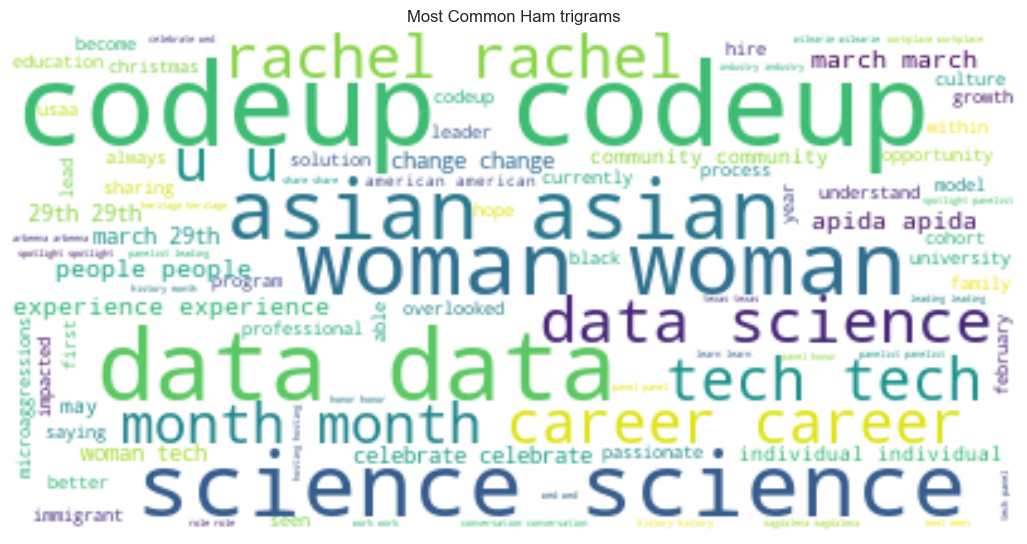

In [37]:
# dfc all bigrams wordcloud

# Convert bigrams into a string format
dfc_bigram_strings = [' '.join(bigram) for bigram in all_bigrams]
text = ' '.join(dfc_bigram_strings)

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Ham trigrams')
plt.show()

# 3.
Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [38]:
#get news df
dfn = a.get_news_articles()
dfn

title  \
0   Sapna Gill's allegations that Prithvi Shaw mol...   
1   Harsha Bhogle shares pic of 40-year-old news a...   
2   Ashleigh Gardner takes 8 wickets in an innings...   
3     ICC shares pic of ODI World Cup trophy in space   
4   Netherlands create history, smash most runs in...   
..                                                ...   
95  I composed tune of 'Chaiyya..', presented it t...   
96  A fan wrote my name with compass, it was creep...   
97  'The Kerala Story' makers announce next film '...   
98  Two girls fought over me in a bar, wasn't a be...   
99  I was like, 'What is she': Amruta Subhash on h...   

                                              content       category  
0   Allegations made by social media influencer Sa...         sports  
1   Commentator Harsha Bhogle shared a picture of ...         sports  
2   Australia all-rounder Ashleigh Gardner took ei...         sports  
3   The ICC has shared a picture of the ODI World ...         sports  
4   Netherlands on Monday smashed the most runs in...         sports  
..                                                ...            ...  
95  Singer Sukhwinder Singh said he "composed" the...  entertainment  
96  Actor Parth Samthaan shared the "weirdest" thi...  entertainment  
97  Director Sudipto Sen and producer Vipul Shah, ...  entertainment  
98  Actor Parth Samthaan in an interview revealed ...  entertainment  
99  Actress Amruta Subhash said that she did not u...  entertainment  

[100 rows x 3 columns]

In [39]:
dfn.category.value_counts()

sports           25
business         25
technology       25
entertainment    25
Name: category, dtype: int64

In [40]:
# we can do that process with a join on a Series and not just a list
# we will do that for ham words, spam words, and all words
# we will pass our basic cleaning on top of that

sports_words = clean(' '.join(dfn[dfn.category=='sports']['content']))
business_words = clean(' '.join(dfn[dfn.category=='business']['content']))
technology_words = clean(' '.join(dfn[dfn.category=='technology']['content']))
entertainment_words = clean(' '.join(dfn[dfn.category=='entertainment']['content']))
all_words = clean(''.join(dfn['content']))

In [41]:
#check it out
sports_words

['allegation',
 'made',
 'social',
 'medium',
 'influencer',
 'sapna',
 'gill',
 'accusing',
 'cricketer',
 'prithvi',
 'shaw',
 'molesting',
 'mumbai',
 'pub',
 'false',
 'unfounded',
 'police',
 'told',
 'court',
 'monday',
 'sapna',
 'arrested',
 'february',
 'connection',
 'alleged',
 'attack',
 'shaw',
 'following',
 'argument',
 'later',
 'granted',
 'bail',
 'moved',
 'court',
 'police',
 'didnt',
 'register',
 'case',
 'shaw',
 'commentator',
 'harsha',
 'bhogle',
 'shared',
 'picture',
 '40yearold',
 'news',
 'article',
 'wrote',
 'india',
 '1983',
 'world',
 'cup',
 'chance',
 'captioned',
 'picture',
 'young',
 'mannot',
 'quite',
 '22thought',
 'india',
 'might',
 'bedark',
 'horse',
 '1983',
 'added',
 'reasoning',
 'wasnt',
 'quite',
 'accurate',
 'turn',
 'end',
 'became',
 'possibleand',
 'father',
 'remembered',
 'paste',
 'whats',
 'nowcrumbling',
 'scrapbook',
 'australia',
 'allrounder',
 'ashleigh',
 'gardner',
 'took',
 'eight',
 'wicket',
 'inning',
 'australia',

In [42]:
#check it out
business_words

['central',
 'consumer',
 'protection',
 'authority',
 'ccpa',
 'imposed',
 'penalty',
 '1',
 'lakh',
 '50000',
 'raus',
 'ia',
 'study',
 'circle',
 'seeker',
 'education',
 'respectively',
 'misleading',
 'advertisement',
 'raus',
 'ia',
 'fined',
 'claim',
 'successful',
 'student',
 'absence',
 'necessary',
 'disclosure',
 'regard',
 'course',
 'opted',
 'aspirant',
 'seeker',
 'education',
 'fined',
 'claiming',
 'success',
 'ratio',
 '9999',
 'google',
 'collaborative',
 'advertisement',
 'government',
 'featuring',
 'financial',
 'influencer',
 'rachana',
 'ranade',
 'caption',
 'trust',
 'real',
 'expert',
 'criticised',
 'online',
 'several',
 'twitter',
 'user',
 'pointed',
 'advertisement',
 'looked',
 'like',
 'government',
 'endorsing',
 'ranade',
 'endorsement',
 'person',
 'social',
 'medium',
 'platform',
 'union',
 'minister',
 'rajeev',
 'chandrasekhar',
 'said',
 'union',
 'minister',
 'nitin',
 'gadkari',
 'said',
 'india',
 'soon',
 'vehicle',
 'running',
 'entirel

In [43]:
#check it out
technology_words

['pm',
 'narendra',
 'modi',
 'said',
 'u',
 'investor',
 'moment',
 'invest',
 'india',
 'government',
 'u',
 'india',
 'laid',
 'groundwork',
 'business',
 'company',
 'take',
 'advantage',
 'opportunity',
 'play',
 'prosper',
 'highlighted',
 'opportunity',
 'india',
 'offer',
 'reiterated',
 'moment',
 'invest',
 'india',
 'growth',
 'story',
 'pakistanbased',
 'hacking',
 'group',
 'named',
 'transparent',
 'tribe',
 'targeting',
 'indian',
 'army',
 'country',
 'education',
 'sector',
 'quick',
 'heal',
 'technology',
 'enterprise',
 'arm',
 'seqrite',
 'reported',
 'per',
 'report',
 'attack',
 'educational',
 'institution',
 'including',
 'iits',
 'nit',
 'reached',
 'peak',
 'february',
 'army',
 'reportedly',
 'targeted',
 'via',
 'malicious',
 'file',
 'called',
 'revision',
 'officer',
 'posting',
 'policy',
 'podcaster',
 'lex',
 'fridman',
 'took',
 'twitter',
 'share',
 'video',
 'training',
 'jiujitsu',
 'metas',
 'billionaire',
 'ceo',
 'mark',
 'zuckerberg',
 'amid',


In [44]:
#check it out
entertainment_words

['pasoori',
 'song',
 'sung',
 'pakistani',
 'singer',
 'ali',
 'sethi',
 'shae',
 'gill',
 'remixed',
 'released',
 'pasoori',
 'nu',
 'sung',
 'arijit',
 'singh',
 'tulsi',
 'kumar',
 'kartik',
 'aaryan',
 'kiara',
 'advanistarrer',
 'satyaprem',
 'ki',
 'katha',
 'people',
 'reacted',
 'remix',
 'tweet',
 'like',
 'one',
 'word',
 'copywood',
 'another',
 'tweeted',
 'song',
 'belongs',
 'india',
 'digital',
 'content',
 'creator',
 'kusha',
 'kapila',
 'revealed',
 'husband',
 'zorawar',
 'singh',
 'ahluwalia',
 'mutually',
 'decided',
 'part',
 'way',
 'six',
 'year',
 'marriage',
 'hasnt',
 'easy',
 'decisionbut',
 'know',
 'right',
 'one',
 'point',
 'life',
 'wrote',
 'continue',
 'coparent',
 'love',
 'life',
 'maya',
 'added',
 'fugitive',
 'gangster',
 'goldy',
 'brar',
 'interview',
 'india',
 'today',
 'stated',
 'definitely',
 'kill',
 'salman',
 'khan',
 'disrespected',
 'bishnoi',
 'community',
 'killing',
 'black',
 'buck',
 'lawrence',
 'bishnoi',
 'asked',
 'apologis

In [45]:
sports_words = clean(' '.join(dfn[dfn.category=='sports']['content']))
business_words = clean(' '.join(dfn[dfn.category=='business']['content']))
technology_words = clean(' '.join(dfn[dfn.category=='technology']['content']))
entertainment_words = clean(' '.join(dfn[dfn.category=='entertainment']['content']))
all_words = clean(''.join(dfn['content']))

In [46]:
# let's get some sights on word frequency by taking our words back apart
# we will split each set of words by the spaces,
# turn that into a list, cast that list as a Series,
# and then take the value counts of that Series
# We will do this for each type of word present

sports_freq = pd.Series(sports_words).value_counts()
business_freq = pd.Series(business_words).value_counts()
technology_freq = pd.Series(technology_words).value_counts()
entertainment_freq = pd.Series(entertainment_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [47]:
#check it out
sports_freq.head()

said     16
indie    14
west     14
india    11
world    10
dtype: int64

In [48]:
#check it out
business_freq.head()

said       21
bank       14
india      14
crore      10
company     9
dtype: int64

In [49]:
#check it out
technology_freq.head()

said          23
india         15
technology    12
u              9
company        8
dtype: int64

In [50]:
#check it out
entertainment_freq.head()

said      17
actor     13
shared    10
added      9
khan       7
dtype: int64

In [51]:
#check it out
all_freq.head()

said          66
india         39
added         20
technology    18
bank          18
dtype: int64

In [52]:
pd.concat([sports_freq, business_freq, technology_freq, entertainment_freq, all_freq], axis=1).fillna(0).astype(int)

0   1   2   3   4
said                  16  21  23  17  66
indie                 14   0   0   0  12
west                  14   0   0   0  14
india                 11  14  15   4  39
world                 10   0   4   0  14
...                   ..  ..  ..  ..  ..
reporteda              0   0   0   0   1
billionrbi             0   0   0   0   1
2021rbi                0   0   0   0   1
saidworkers            0   0   0   0   1
decorationspakistans   0   0   0   0   1

[1976 rows x 5 columns]

In [53]:
# lets combine all 5 dfs horizontally
# fill any missing values with zero
# convert the resulting df to contain only integer values:

word_counts = pd.concat([sports_freq, business_freq, technology_freq, entertainment_freq, all_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ['sports','business','technology', 'entertainment','all']

word_counts.head()

sports  business  technology  entertainment  all
said       16        21          23             17   66
indie      14         0           0              0   12
west       14         0           0              0   14
india      11        14          15              4   39
world      10         0           4              0   14

In [54]:
word_counts.sort_values('all', ascending=False)

sports  business  technology  entertainment  all
said            16        21          23             17   66
india           11        14          15              4   39
added            9         7           5              9   20
technology       0         6          12              0   18
bank             0        14           4              0   18
...            ...       ...         ...            ...  ...
inserted         0         1           1              0    0
reserve          0         2           0              0    0
shanti           0         0           0              1    0
seriously        0         0           1              0    0
9999             0         1           0              0    0

[1976 rows x 5 columns]

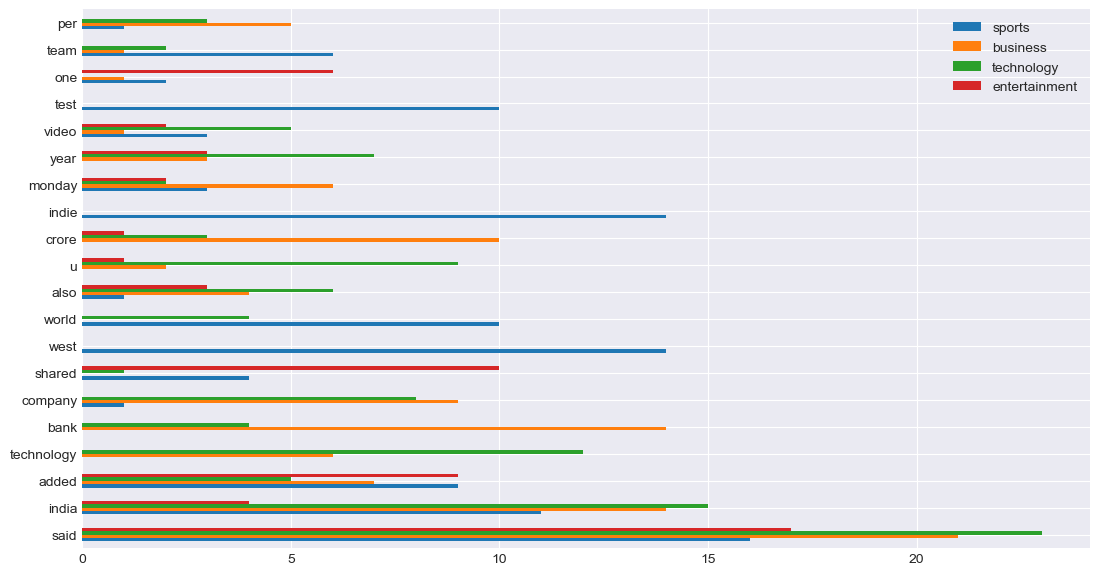

In [55]:
#visualize
word_counts.sort_values('all', ascending=False)[['sports','business','technology', 'entertainment']].head(20).plot.barh()
plt.show()

In [56]:
word_counts.sort_values('all', ascending=False).head(20)\
.apply(lambda row: row/row['all'], axis=1)

sports  business  technology  entertainment  all
said        0.242424  0.318182    0.348485       0.257576  1.0
india       0.282051  0.358974    0.384615       0.102564  1.0
added       0.450000  0.350000    0.250000       0.450000  1.0
technology  0.000000  0.333333    0.666667       0.000000  1.0
bank        0.000000  0.777778    0.222222       0.000000  1.0
company     0.058824  0.529412    0.470588       0.000000  1.0
shared      0.266667  0.000000    0.066667       0.666667  1.0
west        1.000000  0.000000    0.000000       0.000000  1.0
world       0.714286  0.000000    0.285714       0.000000  1.0
also        0.071429  0.285714    0.428571       0.214286  1.0
u           0.000000  0.166667    0.750000       0.083333  1.0
crore       0.000000  0.833333    0.250000       0.083333  1.0
indie       1.166667  0.000000    0.000000       0.000000  1.0
monday      0.250000  0.500000    0.166667       0.166667  1.0
year        0.000000  0.272727    0.636364       0.272727  1.0
video       0.272727  0.090909    0.454545       0.181818  1.0
test        1.000000  0.000000    0.000000       0.000000  1.0
one         0.222222  0.111111    0.000000       0.666667  1.0
team        0.666667  0.111111    0.222222       0.000000  1.0
per         0.111111  0.555556    0.333333       0.000000  1.0

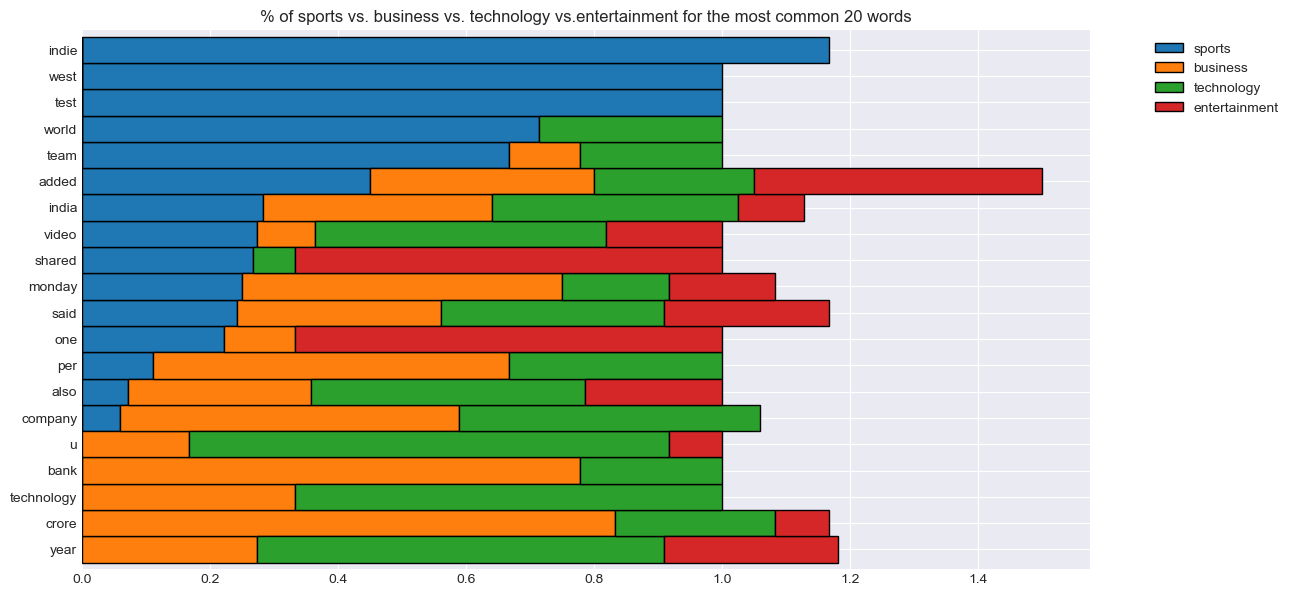

In [57]:
(word_counts.sort_values('all', ascending=False)
.head(20)
.apply(lambda row: row/row['all'], axis = 1)
.drop(columns='all')
.sort_values(by='sports')
.plot.barh(stacked=True, width=1, ec='black')
)

plt.title('% of sports vs. business vs. technology vs.entertainment for the most common 20 words')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.show()

Bigrams

- sports

In [58]:
#bigrams
list(nltk.bigrams(sports_words))

[('allegation', 'made'),
 ('made', 'social'),
 ('social', 'medium'),
 ('medium', 'influencer'),
 ('influencer', 'sapna'),
 ('sapna', 'gill'),
 ('gill', 'accusing'),
 ('accusing', 'cricketer'),
 ('cricketer', 'prithvi'),
 ('prithvi', 'shaw'),
 ('shaw', 'molesting'),
 ('molesting', 'mumbai'),
 ('mumbai', 'pub'),
 ('pub', 'false'),
 ('false', 'unfounded'),
 ('unfounded', 'police'),
 ('police', 'told'),
 ('told', 'court'),
 ('court', 'monday'),
 ('monday', 'sapna'),
 ('sapna', 'arrested'),
 ('arrested', 'february'),
 ('february', 'connection'),
 ('connection', 'alleged'),
 ('alleged', 'attack'),
 ('attack', 'shaw'),
 ('shaw', 'following'),
 ('following', 'argument'),
 ('argument', 'later'),
 ('later', 'granted'),
 ('granted', 'bail'),
 ('bail', 'moved'),
 ('moved', 'court'),
 ('court', 'police'),
 ('police', 'didnt'),
 ('didnt', 'register'),
 ('register', 'case'),
 ('case', 'shaw'),
 ('shaw', 'commentator'),
 ('commentator', 'harsha'),
 ('harsha', 'bhogle'),
 ('bhogle', 'shared'),
 ('share

In [59]:
#trigrams
list(nltk.ngrams(sports_words,3))

[('allegation', 'made', 'social'),
 ('made', 'social', 'medium'),
 ('social', 'medium', 'influencer'),
 ('medium', 'influencer', 'sapna'),
 ('influencer', 'sapna', 'gill'),
 ('sapna', 'gill', 'accusing'),
 ('gill', 'accusing', 'cricketer'),
 ('accusing', 'cricketer', 'prithvi'),
 ('cricketer', 'prithvi', 'shaw'),
 ('prithvi', 'shaw', 'molesting'),
 ('shaw', 'molesting', 'mumbai'),
 ('molesting', 'mumbai', 'pub'),
 ('mumbai', 'pub', 'false'),
 ('pub', 'false', 'unfounded'),
 ('false', 'unfounded', 'police'),
 ('unfounded', 'police', 'told'),
 ('police', 'told', 'court'),
 ('told', 'court', 'monday'),
 ('court', 'monday', 'sapna'),
 ('monday', 'sapna', 'arrested'),
 ('sapna', 'arrested', 'february'),
 ('arrested', 'february', 'connection'),
 ('february', 'connection', 'alleged'),
 ('connection', 'alleged', 'attack'),
 ('alleged', 'attack', 'shaw'),
 ('attack', 'shaw', 'following'),
 ('shaw', 'following', 'argument'),
 ('following', 'argument', 'later'),
 ('argument', 'later', 'granted'),

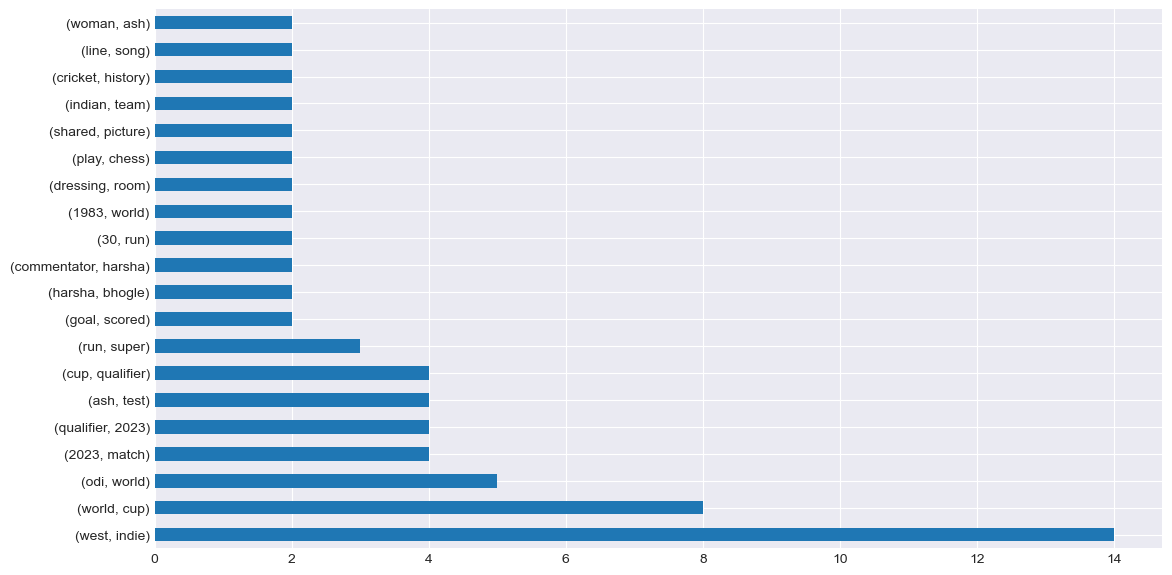

In [60]:
#sports bigrams
pd.Series(nltk.bigrams(sports_words)).value_counts().head(20).plot.barh()
plt.show()

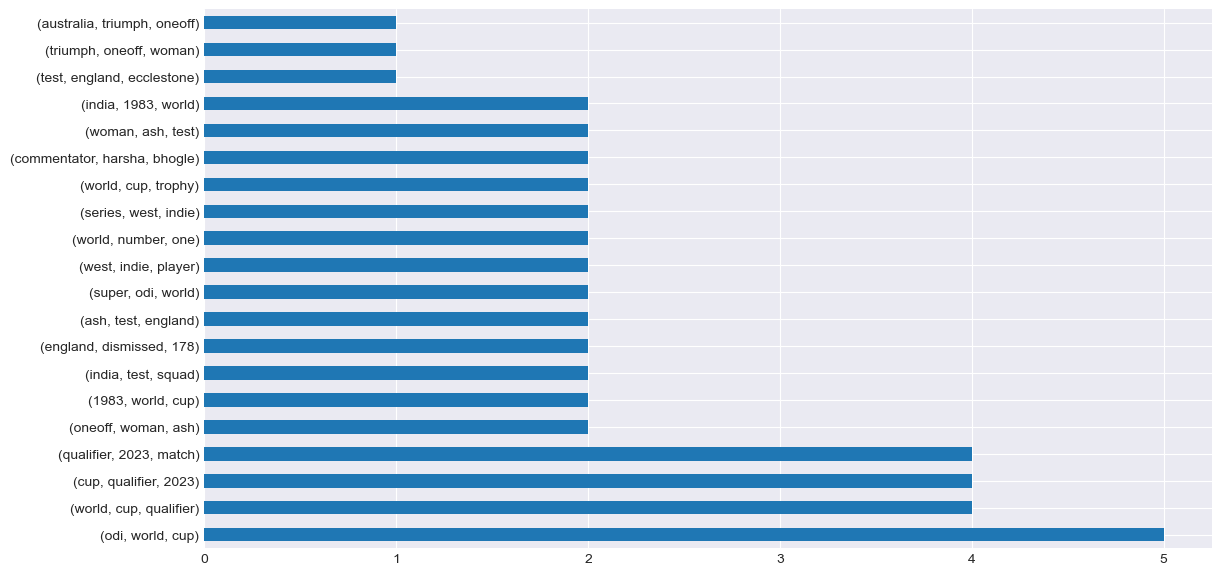

In [61]:
#sports ngrams
pd.Series(nltk.ngrams(sports_words,3)).value_counts().head(20).plot.barh()
plt.show()

- business

In [62]:
#bigrams
list(nltk.bigrams(business_words))

[('central', 'consumer'),
 ('consumer', 'protection'),
 ('protection', 'authority'),
 ('authority', 'ccpa'),
 ('ccpa', 'imposed'),
 ('imposed', 'penalty'),
 ('penalty', '1'),
 ('1', 'lakh'),
 ('lakh', '50000'),
 ('50000', 'raus'),
 ('raus', 'ia'),
 ('ia', 'study'),
 ('study', 'circle'),
 ('circle', 'seeker'),
 ('seeker', 'education'),
 ('education', 'respectively'),
 ('respectively', 'misleading'),
 ('misleading', 'advertisement'),
 ('advertisement', 'raus'),
 ('raus', 'ia'),
 ('ia', 'fined'),
 ('fined', 'claim'),
 ('claim', 'successful'),
 ('successful', 'student'),
 ('student', 'absence'),
 ('absence', 'necessary'),
 ('necessary', 'disclosure'),
 ('disclosure', 'regard'),
 ('regard', 'course'),
 ('course', 'opted'),
 ('opted', 'aspirant'),
 ('aspirant', 'seeker'),
 ('seeker', 'education'),
 ('education', 'fined'),
 ('fined', 'claiming'),
 ('claiming', 'success'),
 ('success', 'ratio'),
 ('ratio', '9999'),
 ('9999', 'google'),
 ('google', 'collaborative'),
 ('collaborative', 'advertis

In [63]:
#trigrams
list(nltk.ngrams(business_words,3))

[('central', 'consumer', 'protection'),
 ('consumer', 'protection', 'authority'),
 ('protection', 'authority', 'ccpa'),
 ('authority', 'ccpa', 'imposed'),
 ('ccpa', 'imposed', 'penalty'),
 ('imposed', 'penalty', '1'),
 ('penalty', '1', 'lakh'),
 ('1', 'lakh', '50000'),
 ('lakh', '50000', 'raus'),
 ('50000', 'raus', 'ia'),
 ('raus', 'ia', 'study'),
 ('ia', 'study', 'circle'),
 ('study', 'circle', 'seeker'),
 ('circle', 'seeker', 'education'),
 ('seeker', 'education', 'respectively'),
 ('education', 'respectively', 'misleading'),
 ('respectively', 'misleading', 'advertisement'),
 ('misleading', 'advertisement', 'raus'),
 ('advertisement', 'raus', 'ia'),
 ('raus', 'ia', 'fined'),
 ('ia', 'fined', 'claim'),
 ('fined', 'claim', 'successful'),
 ('claim', 'successful', 'student'),
 ('successful', 'student', 'absence'),
 ('student', 'absence', 'necessary'),
 ('absence', 'necessary', 'disclosure'),
 ('necessary', 'disclosure', 'regard'),
 ('disclosure', 'regard', 'course'),
 ('regard', 'course'

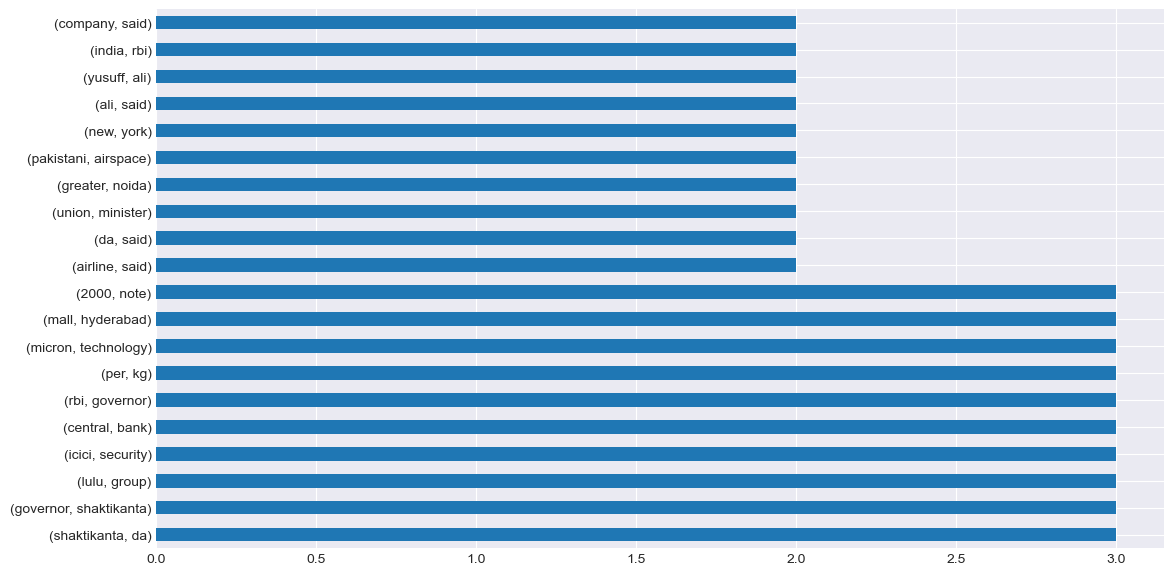

In [64]:
#business bigrams
pd.Series(nltk.bigrams(business_words)).value_counts().head(20).plot.barh()
plt.show()

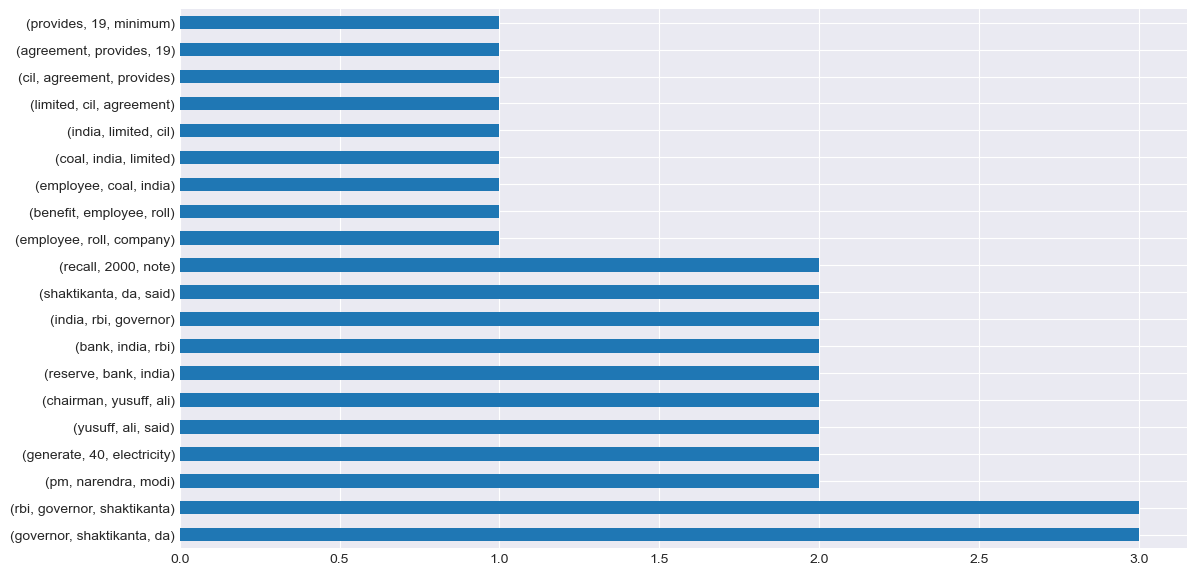

In [65]:
#business ngrams
pd.Series(nltk.ngrams(business_words,3)).value_counts().head(20).plot.barh()
plt.show()

- technology

In [66]:
#bigrams
list(nltk.bigrams(technology_words))

[('pm', 'narendra'),
 ('narendra', 'modi'),
 ('modi', 'said'),
 ('said', 'u'),
 ('u', 'investor'),
 ('investor', 'moment'),
 ('moment', 'invest'),
 ('invest', 'india'),
 ('india', 'government'),
 ('government', 'u'),
 ('u', 'india'),
 ('india', 'laid'),
 ('laid', 'groundwork'),
 ('groundwork', 'business'),
 ('business', 'company'),
 ('company', 'take'),
 ('take', 'advantage'),
 ('advantage', 'opportunity'),
 ('opportunity', 'play'),
 ('play', 'prosper'),
 ('prosper', 'highlighted'),
 ('highlighted', 'opportunity'),
 ('opportunity', 'india'),
 ('india', 'offer'),
 ('offer', 'reiterated'),
 ('reiterated', 'moment'),
 ('moment', 'invest'),
 ('invest', 'india'),
 ('india', 'growth'),
 ('growth', 'story'),
 ('story', 'pakistanbased'),
 ('pakistanbased', 'hacking'),
 ('hacking', 'group'),
 ('group', 'named'),
 ('named', 'transparent'),
 ('transparent', 'tribe'),
 ('tribe', 'targeting'),
 ('targeting', 'indian'),
 ('indian', 'army'),
 ('army', 'country'),
 ('country', 'education'),
 ('educati

In [67]:
#trigrams
list(nltk.ngrams(technology_words,3))

[('pm', 'narendra', 'modi'),
 ('narendra', 'modi', 'said'),
 ('modi', 'said', 'u'),
 ('said', 'u', 'investor'),
 ('u', 'investor', 'moment'),
 ('investor', 'moment', 'invest'),
 ('moment', 'invest', 'india'),
 ('invest', 'india', 'government'),
 ('india', 'government', 'u'),
 ('government', 'u', 'india'),
 ('u', 'india', 'laid'),
 ('india', 'laid', 'groundwork'),
 ('laid', 'groundwork', 'business'),
 ('groundwork', 'business', 'company'),
 ('business', 'company', 'take'),
 ('company', 'take', 'advantage'),
 ('take', 'advantage', 'opportunity'),
 ('advantage', 'opportunity', 'play'),
 ('opportunity', 'play', 'prosper'),
 ('play', 'prosper', 'highlighted'),
 ('prosper', 'highlighted', 'opportunity'),
 ('highlighted', 'opportunity', 'india'),
 ('opportunity', 'india', 'offer'),
 ('india', 'offer', 'reiterated'),
 ('offer', 'reiterated', 'moment'),
 ('reiterated', 'moment', 'invest'),
 ('moment', 'invest', 'india'),
 ('invest', 'india', 'growth'),
 ('india', 'growth', 'story'),
 ('growth',

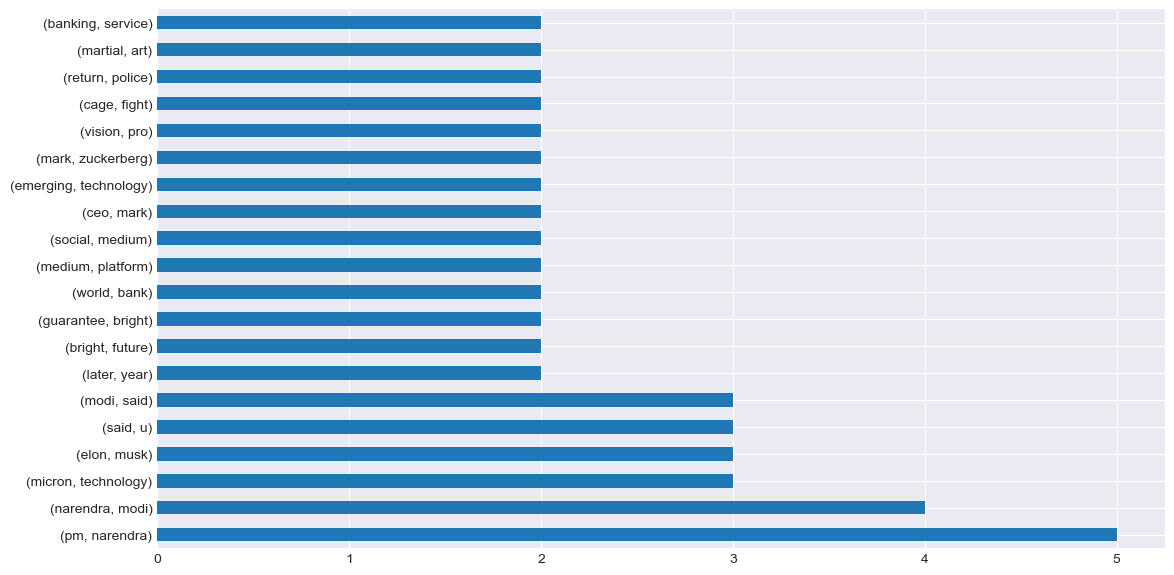

In [68]:
#technology bigrams
pd.Series(nltk.bigrams(technology_words)).value_counts().head(20).plot.barh()
plt.show()

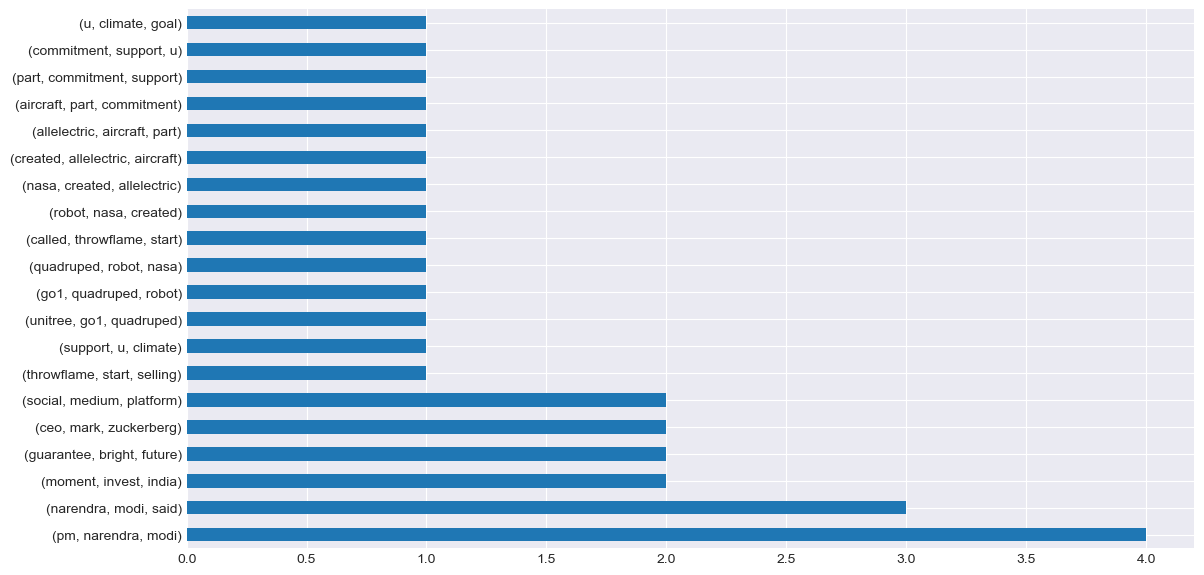

In [69]:
#technology ngrams
pd.Series(nltk.ngrams(technology_words,3)).value_counts().head(20).plot.barh()
plt.show()

- entertainment

In [70]:
#bigrams
list(nltk.bigrams(entertainment_words))

[('pasoori', 'song'),
 ('song', 'sung'),
 ('sung', 'pakistani'),
 ('pakistani', 'singer'),
 ('singer', 'ali'),
 ('ali', 'sethi'),
 ('sethi', 'shae'),
 ('shae', 'gill'),
 ('gill', 'remixed'),
 ('remixed', 'released'),
 ('released', 'pasoori'),
 ('pasoori', 'nu'),
 ('nu', 'sung'),
 ('sung', 'arijit'),
 ('arijit', 'singh'),
 ('singh', 'tulsi'),
 ('tulsi', 'kumar'),
 ('kumar', 'kartik'),
 ('kartik', 'aaryan'),
 ('aaryan', 'kiara'),
 ('kiara', 'advanistarrer'),
 ('advanistarrer', 'satyaprem'),
 ('satyaprem', 'ki'),
 ('ki', 'katha'),
 ('katha', 'people'),
 ('people', 'reacted'),
 ('reacted', 'remix'),
 ('remix', 'tweet'),
 ('tweet', 'like'),
 ('like', 'one'),
 ('one', 'word'),
 ('word', 'copywood'),
 ('copywood', 'another'),
 ('another', 'tweeted'),
 ('tweeted', 'song'),
 ('song', 'belongs'),
 ('belongs', 'india'),
 ('india', 'digital'),
 ('digital', 'content'),
 ('content', 'creator'),
 ('creator', 'kusha'),
 ('kusha', 'kapila'),
 ('kapila', 'revealed'),
 ('revealed', 'husband'),
 ('husband

In [71]:
#trigrams
list(nltk.ngrams(entertainment_words,3))

[('pasoori', 'song', 'sung'),
 ('song', 'sung', 'pakistani'),
 ('sung', 'pakistani', 'singer'),
 ('pakistani', 'singer', 'ali'),
 ('singer', 'ali', 'sethi'),
 ('ali', 'sethi', 'shae'),
 ('sethi', 'shae', 'gill'),
 ('shae', 'gill', 'remixed'),
 ('gill', 'remixed', 'released'),
 ('remixed', 'released', 'pasoori'),
 ('released', 'pasoori', 'nu'),
 ('pasoori', 'nu', 'sung'),
 ('nu', 'sung', 'arijit'),
 ('sung', 'arijit', 'singh'),
 ('arijit', 'singh', 'tulsi'),
 ('singh', 'tulsi', 'kumar'),
 ('tulsi', 'kumar', 'kartik'),
 ('kumar', 'kartik', 'aaryan'),
 ('kartik', 'aaryan', 'kiara'),
 ('aaryan', 'kiara', 'advanistarrer'),
 ('kiara', 'advanistarrer', 'satyaprem'),
 ('advanistarrer', 'satyaprem', 'ki'),
 ('satyaprem', 'ki', 'katha'),
 ('ki', 'katha', 'people'),
 ('katha', 'people', 'reacted'),
 ('people', 'reacted', 'remix'),
 ('reacted', 'remix', 'tweet'),
 ('remix', 'tweet', 'like'),
 ('tweet', 'like', 'one'),
 ('like', 'one', 'word'),
 ('one', 'word', 'copywood'),
 ('word', 'copywood', 'a

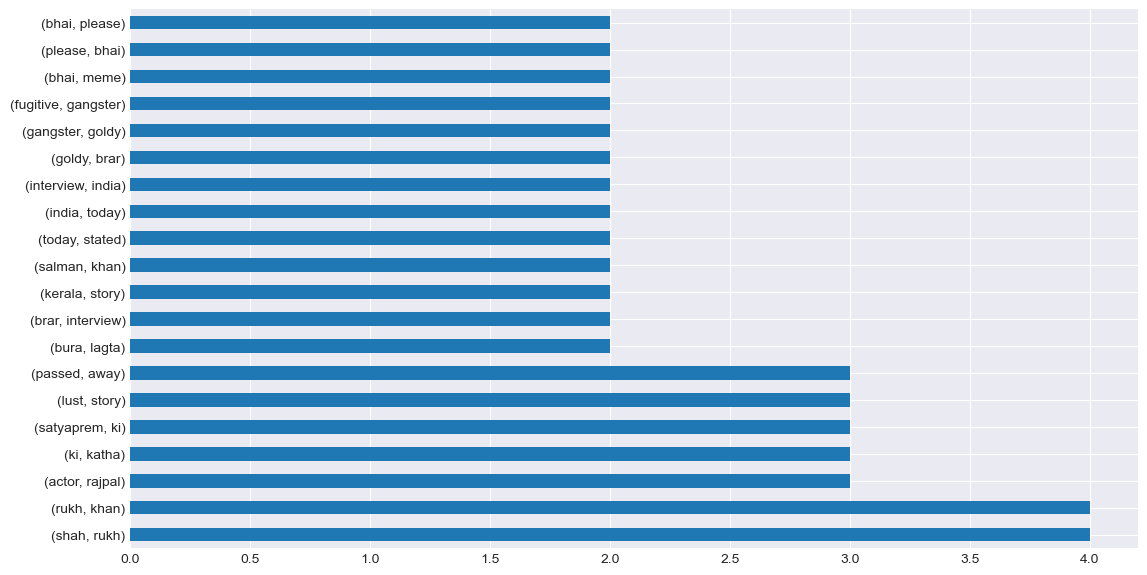

In [72]:
#entertainment bigrams
pd.Series(nltk.bigrams(entertainment_words)).value_counts().head(20).plot.barh()
plt.show()

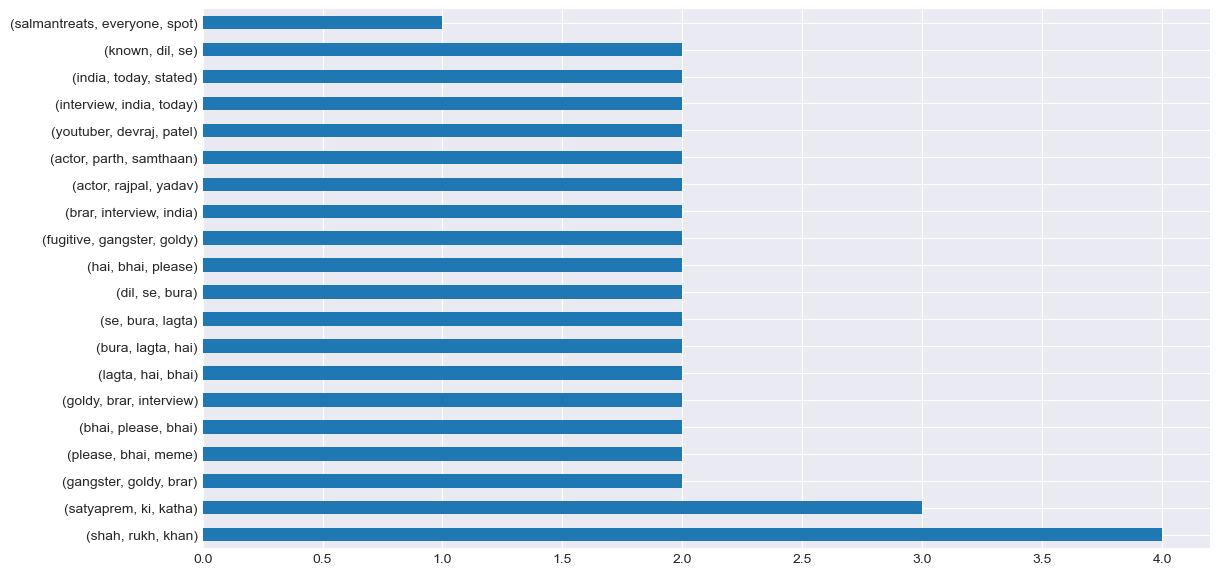

In [73]:
#entertainment ngrams
pd.Series(nltk.ngrams(entertainment_words,3)).value_counts().head(20).plot.barh()
plt.show()

# Word Cloud

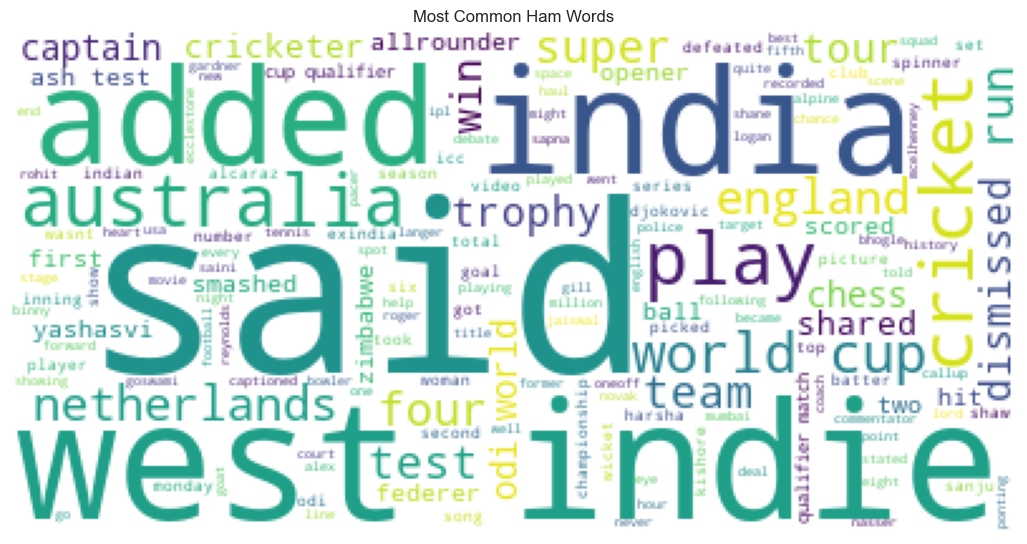

In [74]:
# sports word cloud
img = WordCloud(background_color='white').generate(' '.join(sports_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

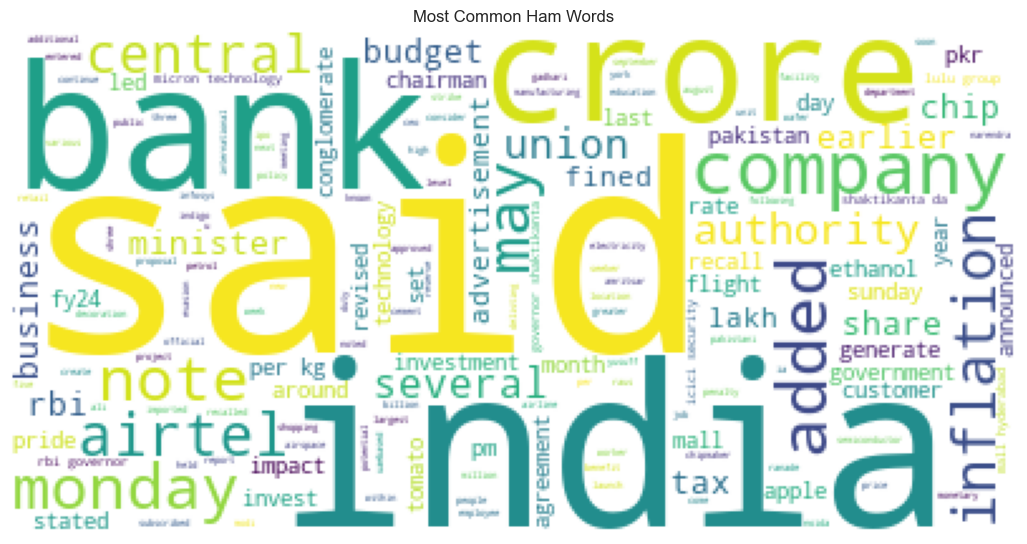

In [75]:
# business word cloud
img = WordCloud(background_color='white').generate(' '.join(business_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

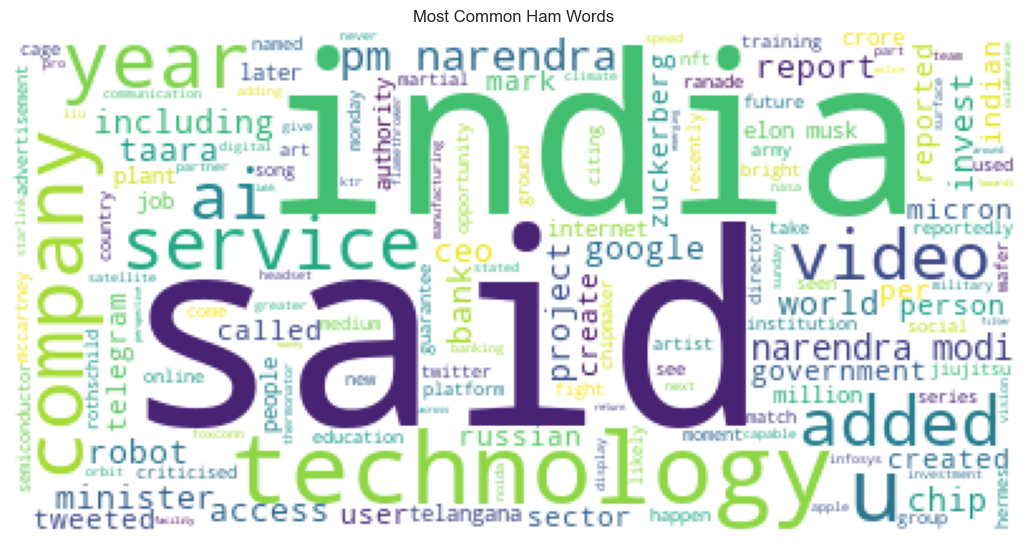

In [76]:
# technology word cloud
img = WordCloud(background_color='white').generate(' '.join(technology_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

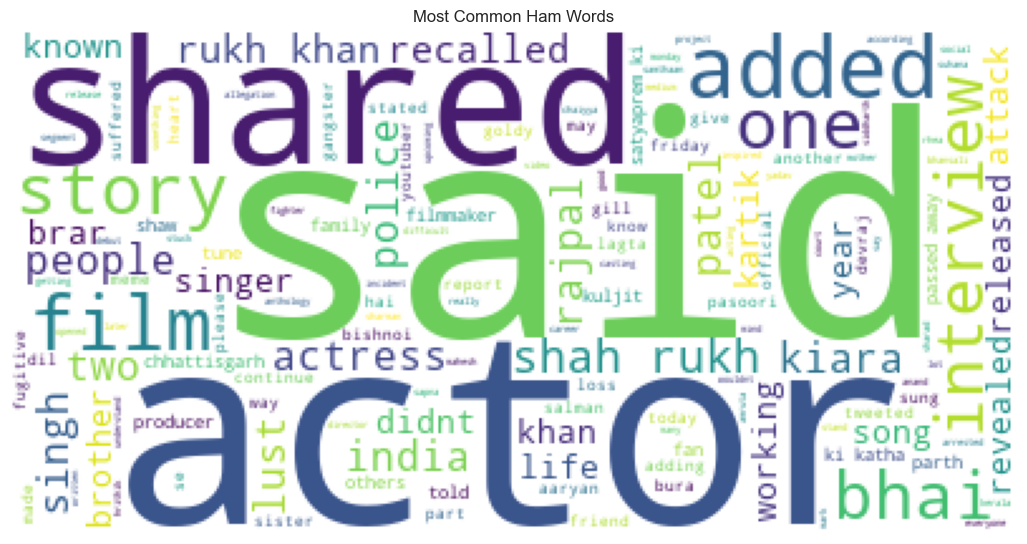

In [77]:
# entertainment word cloud
img = WordCloud(background_color='white').generate(' '.join(entertainment_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

- add features

In [78]:
# add two new columns 'message_length' and 'word_count'

dfn['message_length'] = dfn['content'].str.len()

In [79]:
# we apply our clean function, apply len chained on it
# if we did not want to clean this before word count, we would want to do a split on it

dfn['word_count'] = dfn.content.apply(clean).apply(len)

In [80]:
#check it out
df.head()

label                                               text
id                                                         
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

# Sentiment

In [81]:
# create nltk.sentiment.SentimentIntensityAnalyser()
# use polarity_scores from that object

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [82]:
#apply to dataframe
dfn['sentiment'] = dfn['content'].apply(lambda doc: sia.polarity_scores(doc)['compound'])
df.head()

label                                               text
id                                                         
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

In [83]:
# is the mean and median values of sentiment score different for categories?

dfn.groupby('category').sentiment.agg(['mean','median'])

mean  median
category                       
business       0.271024  0.2960
entertainment  0.049024  0.3400
sports         0.471408  0.4417
technology     0.314976  0.4019

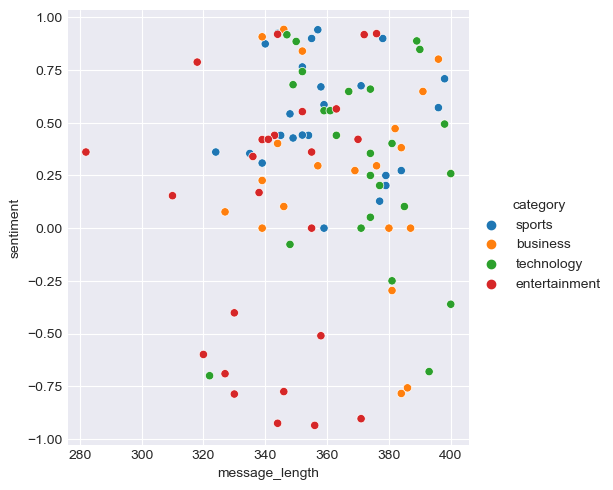

In [84]:
#plot message_length vs sentiment and hue by label

sns.relplot(data=dfn, x='message_length', y='sentiment', hue='category');

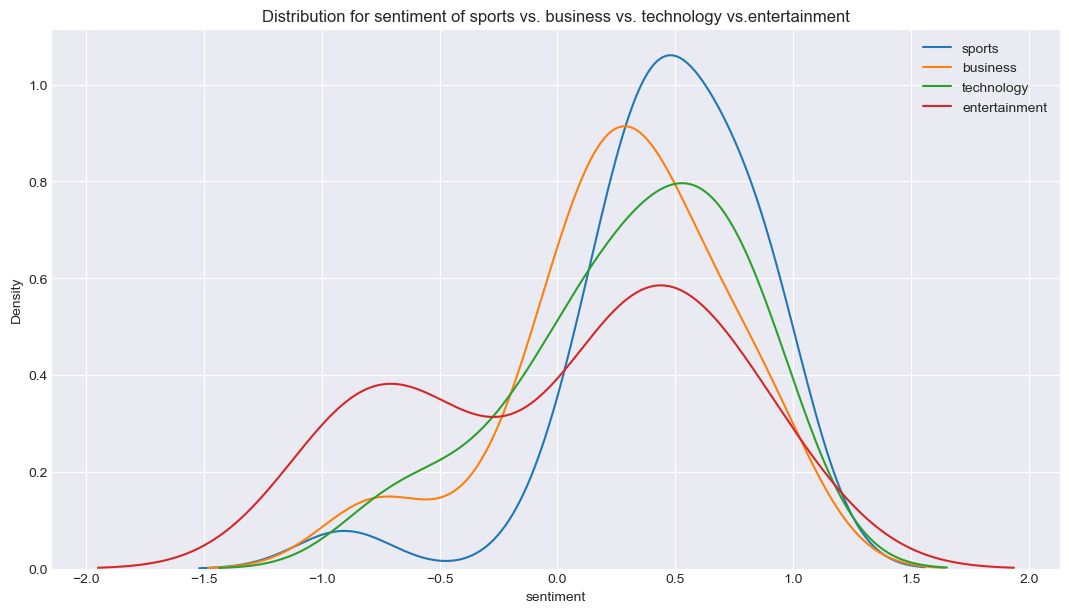

In [85]:
# is the distribution for sentiment different for ham vs spam

sns.kdeplot(dfn[dfn.category=='sports'].sentiment, label='sports')
sns.kdeplot(dfn[dfn.category=='business'].sentiment, label='business')
sns.kdeplot(dfn[dfn.category=='technology'].sentiment, label='technology')
sns.kdeplot(dfn[dfn.category=='entertainment'].sentiment, label='entertainment')

plt.legend(['sports', 'business', 'technology','entertainment'])
plt.title("Distribution for sentiment of sports vs. business vs. technology vs.entertainment")
plt.show()

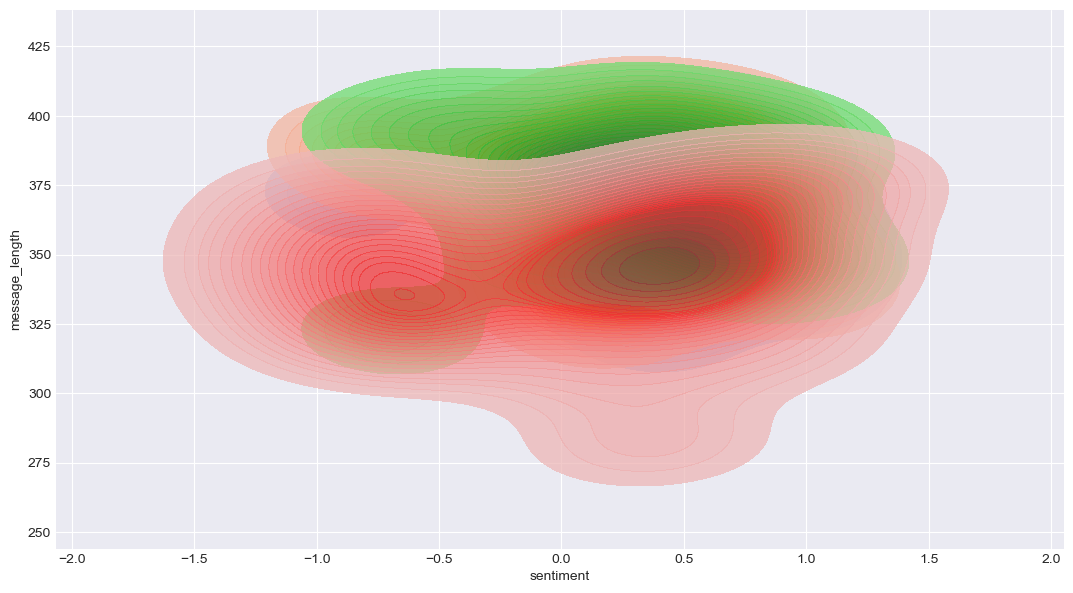

In [90]:
# Bivariate KDE plot for message_length vs sentiment score 
sns.kdeplot(
    x=dfn[dfn.category == 'sports'].sentiment,
    y=dfn[dfn.category == 'sports'].message_length, 
    levels = 30, shade = True, alpha=0.75);

sns.kdeplot(
    x=dfn[dfn.category == 'business'].sentiment,
    y=dfn[dfn.category == 'business'].message_length, 
    levels = 30, shade = True, alpha=0.75);

sns.kdeplot(
    x=dfn[dfn.category == 'technology'].sentiment,
    y=dfn[dfn.category == 'technology'].message_length, 
    levels = 30, shade = True, alpha=0.75);

sns.kdeplot(
    x=dfn[dfn.category == 'entertainment'].sentiment,
    y=dfn[dfn.category == 'entertainment'].message_length, 
    levels = 30, shade = True, alpha=0.75);


plt.show()

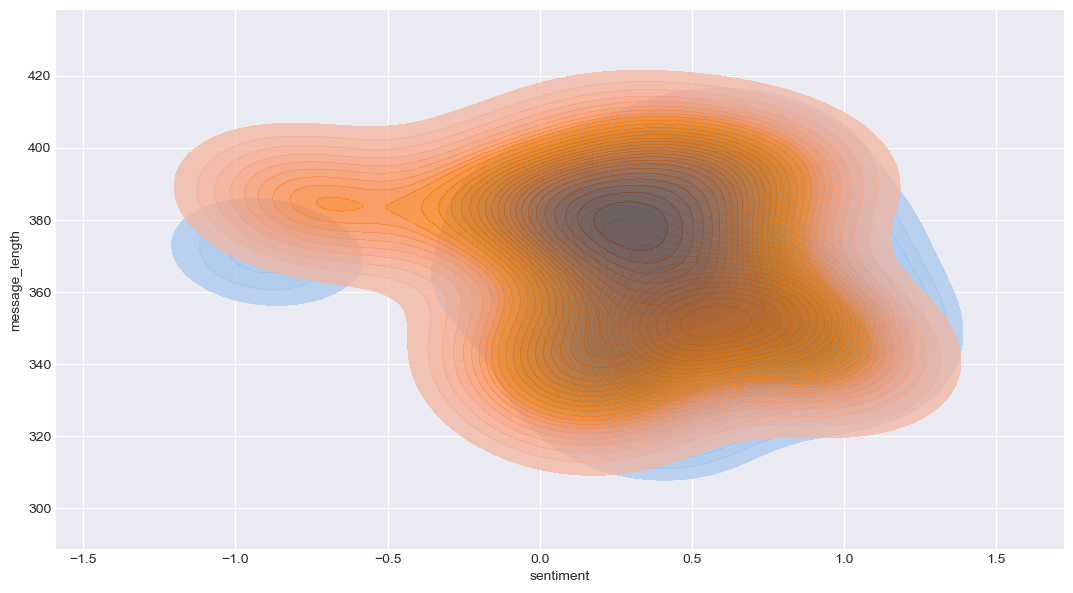

In [91]:
# Bivariate KDE plot for message_length vs sentiment score 
sns.kdeplot(
    x=dfn[dfn.category == 'sports'].sentiment,
    y=dfn[dfn.category == 'sports'].message_length, 
    levels = 30, shade = True, alpha=0.75);

sns.kdeplot(
    x=dfn[dfn.category == 'business'].sentiment,
    y=dfn[dfn.category == 'business'].message_length, 
    levels = 30, shade = True, alpha=0.75);


plt.show()

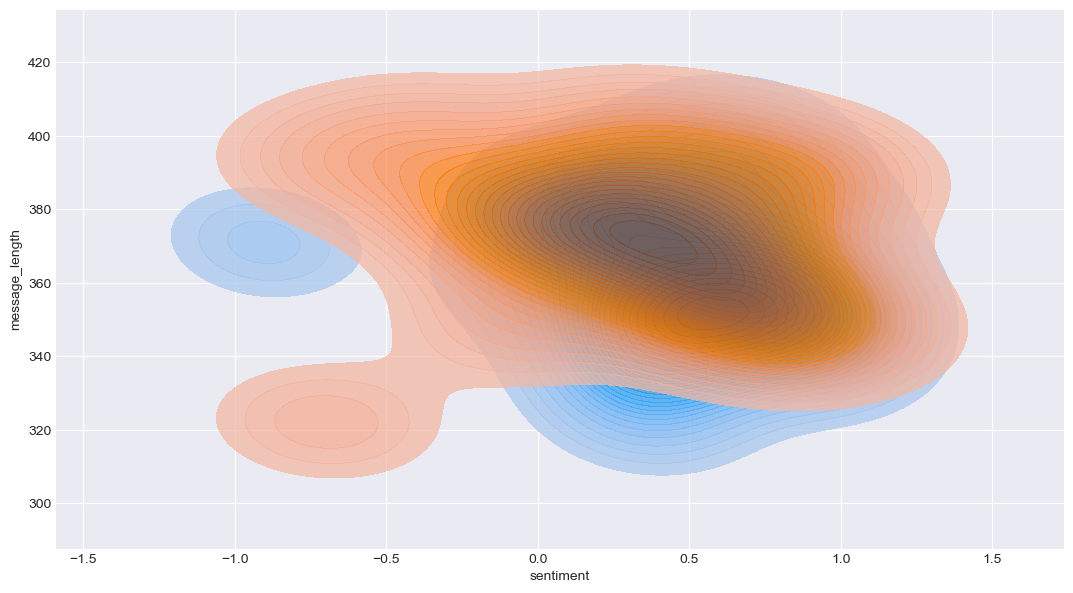

In [92]:
# Bivariate KDE plot for message_length vs sentiment score 
sns.kdeplot(
    x=dfn[dfn.category == 'sports'].sentiment,
    y=dfn[dfn.category == 'sports'].message_length, 
    levels = 30, shade = True, alpha=0.75);

sns.kdeplot(
    x=dfn[dfn.category == 'technology'].sentiment,
    y=dfn[dfn.category == 'technology'].message_length, 
    levels = 30, shade = True, alpha=0.75);


plt.show()

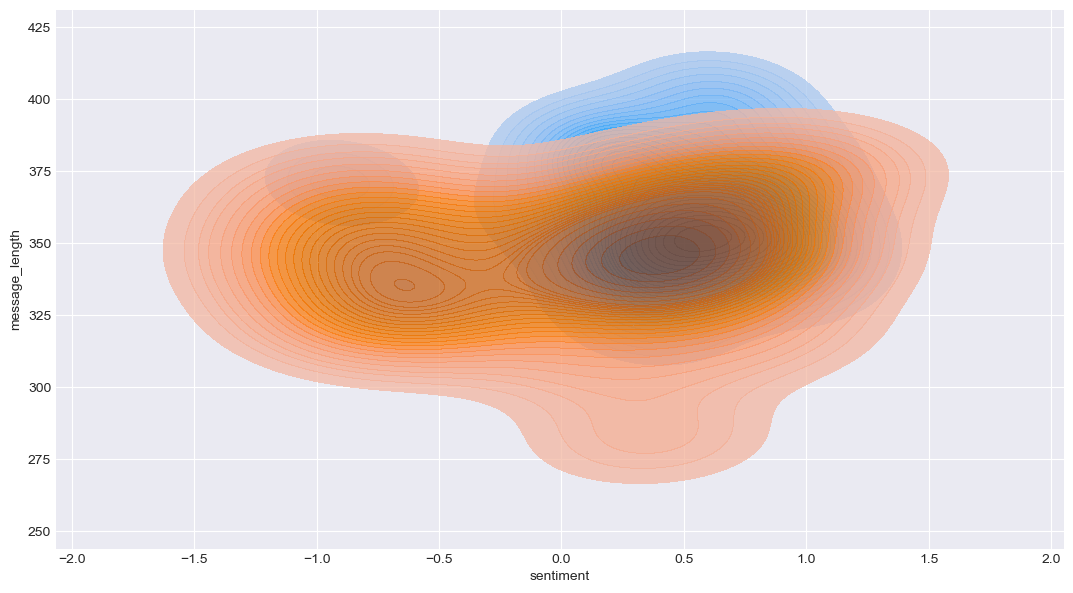

In [93]:
# Bivariate KDE plot for message_length vs sentiment score 
sns.kdeplot(
    x=dfn[dfn.category == 'sports'].sentiment,
    y=dfn[dfn.category == 'sports'].message_length, 
    levels = 30, shade = True, alpha=0.75);

sns.kdeplot(
    x=dfn[dfn.category == 'entertainment'].sentiment,
    y=dfn[dfn.category == 'entertainment'].message_length,
    levels = 30, shade = True, alpha=0.75);

plt.show()